<a href="https://colab.research.google.com/github/CienciaDatosUdea/002_EstudiantesAprendizajeEstadistico/blob/main/semestre2025-2/Laboratorios/Laboratorio_03_reg_lin_grad_descV1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Regresión lineal:

Supongamos que tenemos un sistema en el que existe un predicor con  **m** valores de entrenamiento,  asi:   $ (x^{(1)}, y^{(1)} ) , (x^{(2)}, y^{(2)}) ... (x^{(m)}, y^{(m)})$


|Training|Y  | X_1  |
|--------|---|----------|
|$1$     |$Y^{1}$ | $X_1^{1}$|
|$2$     |$Y^{2}$ | $X_1^{2}$|
|$.$     |$.$     | $.$      |
|$.$     |$.$     | $.$      |
|$.$     |$.$     | $.$      |
|$m$     |$Y^{m}$ | $X_1^{m}$  |



Podemos definir un modelo lineal  como : $h(X) = \theta_0 + \theta_1 X$ con $(\theta_0 , \theta_1)$ parámetros. Nuestro objetivo es encontrar el conjunto de puntos  $(\theta_0 , \theta_1)$ que se encuentan más "cercano" a $Y$ para cada $X$.

Para la optimización, vamos a definir la función de coste **$J(\theta_1,\theta_2 )$** para las muestras de entrenamiento como aquella que garantiza la distancia euclidiana respecto a la hipotesis planteada, así:

\begin{equation}
J(\theta_1, \theta_2)=\frac{1}{2m} \sum_{i=0}^m ( h_{\theta} (x^{(i)})-y^{(i)})^2
\end{equation}

Para encontrar los valores  $(\theta_0 , \theta_1)$ se necesita  minimizar la función de coste, que permite obtener los valores más cercanos,  esta minimización podrá ser realizada a través de diferentes métodos el más conocido es el gradiente descendente.

![](https://github.com/hernansalinas/Curso_aprendizaje_estadistico/blob/main/Sesiones/imagenes/fig00.png?raw=true=50x)


Supongamos un modelo lineal para realizar la predicción, así nuestro modelo estará basado en la siguiente hipotesis de trabajo:

$h(X) =\theta_0 + \theta_1 X$


Reemplando el modelo anterior en la función de coste, tenemos que:



\begin{equation}
J(\theta_1, \theta_2)=\frac{1}{2m} \sum_{i=0}^m ( (\theta_0 + \theta_1 X)- y^{(i)})^2
\end{equation}

# Modelo de *machine learning*: Solución general

Un modelo general para solucionar un problema de machinine learning puede ser estructurado como sigue:


a. Eliger el modelo a emplear:
\begin{equation}
h(X,\Theta)
\end{equation}

- En el caso de una regresion lineal tenemos que $h(X,\Theta=(\theta_0, \theta_1))$:

    \begin{equation}
    h(X) = (\theta_0 + \theta_1 X)
    \end{equation}


b. Eligir la funcion de coste :
-  Metrica Ecuclidiana:
\begin{equation}
J(\Theta)=\frac{1}{2m} \sum_{i=1}^m ( h_{\theta} (X^{(i)})-y^{(i)})^2
\end{equation}
- [Lista de funciones de coste que pueden ser empleadas](https://jmlb.github.io/flashcards/2018/04/21/list_cost_functions_fo_neuralnets/)


c. Aplicar el gradiente descendente iterativamente, hasta encontrar el minimo:  

\begin{equation}
\Delta \vec{\Theta} =  - \alpha \nabla J(\Theta)
\end{equation}



- En el caso de una regresion lineal tenemos que $h(X,\Theta=(\theta_0, \theta_1))$:


\begin{equation}
\theta_0 := \theta_0 - \alpha \frac{\partial J}{\partial \theta_0}
\end{equation}

\begin{equation}
\theta_1 := \theta_1 - \alpha \frac{\partial J}{\partial \theta_1}
\end{equation}


# Laboratorio 03
##Marhia José Granada Restrepo

In [298]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import LinearRegression
from matplotlib import cm
from matplotlib.ticker import LinearLocator

###1. Supongamos que un conjunto de características y datos etiquetados estan dados de la siguiente manera:

Crear un data frame de pandas con los siguientes datos:

|Entrenamiento|Y| X_1 |
|-|-|-|
|0|0|0|
|1|1|1|
|2|2|2|
|3|3|3|
|4|4|4|
|m|5|5|


In [299]:
data = {"Y": [0, 1, 2, 3, 4, 5], "X_1": [0, 1, 2, 3, 4, 5]}
df = pd.DataFrame(data)
df.index.name = "Entrenamiento"
df

,Y,X_1
Entrenamiento,,
0,0,0
1,1,1
2,2,2
3,3,3
4,4,4
5,5,5


###2. Crear una función para calcular la función de coste.



\begin{equation}
J(\theta_1, \theta_2)=\frac{1}{2m} \sum_{i=0}^m ( (\theta_0 + \theta_1 X^{(i)})- y^{(i)})^2
\end{equation}


In [300]:
def cost(theta_0, theta_1, X, y):
  m = len(X)
  J = 1/(2*m)*np.sum(((theta_0 + theta_1*X)-y)**2)
  return J

###3. Asumiendo que $\theta_0=0$, represente gráficamente la función de costo para diferentes valores de $\theta_1$. Determine el valor mínimo de la función de costo y, con este valor, grafique la ecuación de regresión obtenida sobre los datos del dataframe que ha construido.

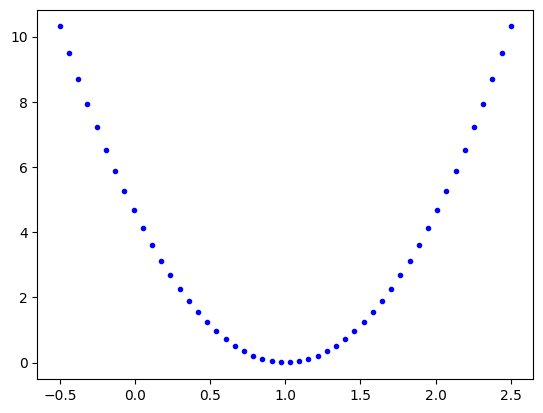

In [301]:
theta_0 = 0
theta_1 = np.linspace(-0.5, 2.5, 50)
X = df['X_1'].values
Y = df['Y'].values
J=np.zeros(len(theta_1))
for i, t in enumerate(theta_1):
  J[i] = cost(theta_0, t, X, Y)

plt.plot(theta_1, J, "b.")
plt.show()

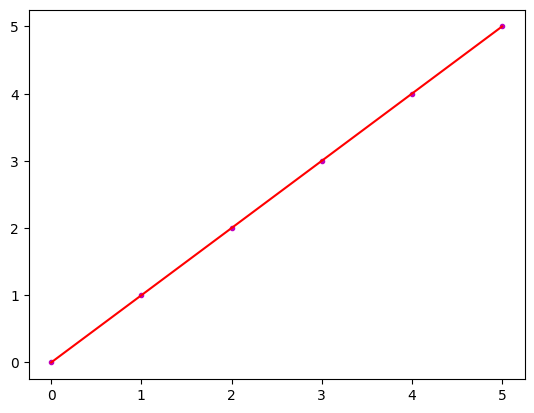

In [302]:
#J min in theta_1 = 1.0
theta_min = 1.0

def h(X, theta_0, theta_1):
  return theta_0 + theta_1*X

pred = h(X, theta_0, theta_min)
plt.plot(X, Y, "m.")
plt.plot(X, pred, "r-")
plt.show()

###4. Suponiendo ahora que los datos de entrenamiento viene dados de la siguiente manera:

|Entrenamiento|Y| X_1 |
|-|-|-|
|0|0|0|
|1|1|1|
|2|2|2|
|3|3|3|
|4|4|4|
|m|5|5|

Encontrar la función de coste para diferentes valores de $\theta_0$, $\theta_1$.
Para ello puede emplear los metodos `surface` y `contour` dentro de la libreria de `matplotlib`.  Construya primero, con los valores de $\theta_0$, $\theta_1 $ definidos un `np.meshgrid` y evalue  para cada punto $\theta_0$, $\theta_1$ la función de coste.

Para el gráfico 3D puede emplear algo similar a las siguientes lineas de código

```
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot_surface(t0, t1, J )
ax.contour(t0, t1, J, 200,   linestyles="solid")
ax.set_xlabel("$\theta_0$")
ax.set_ylabel("$\\theta_1$")
plt.show()
```


En los casos anteriores la solución solo involucra 1 y 2 parámetros para la representación de la función de coste en  2D y 3D respectivamente. Cuando se tienen más parametros a optmizar, no podemos tener una representacion gráfica, análoga a los casos anteriores. Notese además que los datos anteriores no tiene ningún ruido y solo se esta realizados  de esta manera, por motivos didácticos.

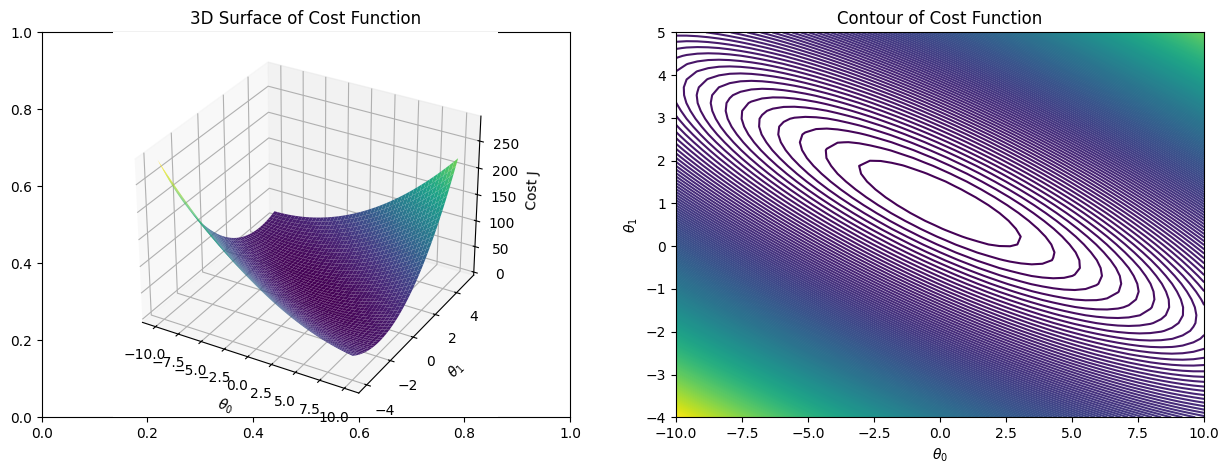

In [303]:
theta_0 = np.linspace(-10,10, 50)
theta_1 = np.linspace(-4, 5, 50)

T0, T1 = np.meshgrid(theta_0, theta_1)

J = np.zeros((len(theta_0), len(theta_1)))

for i, t in enumerate(theta_1):
  for j, t0 in enumerate(theta_0):
    J[i, j] = cost(t0, t, X, Y)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize =(15,5))

#3d plot
ax1 = fig.add_subplot(1,2,1, projection="3d")
ax1.plot_surface(T0, T1, J, cmap="viridis")
ax1.set_xlabel("$\\theta_0$")
ax1.set_ylabel("$\\theta_1$")
ax1.set_zlabel("Cost J")
ax1.set_title("3D Surface of Cost Function")

#Contour plot
ax2.contour(T0, T1, J, levels = 200,   linestyles="solid")
ax2.set_xlabel("$\\theta_0$")
ax2.set_ylabel("$\\theta_1$")
ax2.set_title("Contour of Cost Function")
plt.show()

###5. Encontrar la expresión teórica para la función de coste en el caso 1D y 2D.

In [304]:
X = df['X_1'].values
Y = df['Y'].values

theta_1_teo = np.sum((X - X.mean())*(Y - Y.mean())) / np.sum((X - X.mean())**2)
theta_0_teo = Y.mean() - theta_1_teo * X.mean()

print("Theta 0 teórico:", theta_0_teo)
print("Theta 1 teórico:", theta_1_teo)

Theta 0 teórico: 0.0
Theta 1 teórico: 1.0


Los mínimos son calculados haciendo uso de las fórmulas de mínimos cuadrados, usando relaciones entre las medias de X y Y

###6. Construya un algoritmo en el que emplee el gradiente descente para determinar el minimo de una función, determine el mínimo con una error epsilon de  1E-4, pruebe su algoritmo para $f(x)= (x-4)^2$ y al menos 3 valores de $\alpha$

In [305]:
def gradient_descent(f_prime, x0, alpha, epsilon=1e-4, max_iter=1000):
  x = x0
  for i in range(max_iter):
    grad = f_prime(x)
    x_new = x - alpha * grad
    if abs(x_new - x) < epsilon: #Stops when the error is less than epsilon
      break
    x = x_new
    return x

In [306]:
def f(x):
  return (x - 4)**2

def df(x):
  return 2*(x - 4)

In [307]:
alphas = [0.01, 0.1, 0.5]
x0 = np.random.rand() * 10  # valor inicial aleatorio

for alpha in alphas:
  xmin = gradient_descent(df, x0, alpha)
  print(f"α={alpha}, x_min={xmin}, f(x_min)={f(xmin)}")

α=0.01, x_min=1.7220163010838345, f(x_min)=5.189209732527776
α=0.1, x_min=2.1404214702725177, f(x_min)=3.4580323082234248
α=0.5, x_min=4.0, f(x_min)=0.0


###7. Para responder este punto puede consultar la siguiente  página y seguir el video

[Ejemplo guia: dotcsv](https://www.youtube.com/watch?v=-_A_AAxqzCg):

Encontrar el mínimo de la siguiente función a través del metodo del gradiente descendente https://en.wikipedia.org/wiki/Gradient_descent:


\begin{equation}
F(x,y) = \sin \left( \frac{1}{2}x^2-\frac{1}{4}y^2 +3\right) \cos (2x+1-e^y)
\end{equation}

  -  Para ello realice una gráfica de la función en 3D, y un mapa de contorno de la función.
  - Determine el valor mínimo de la función con el metodo del gradiente descendente.


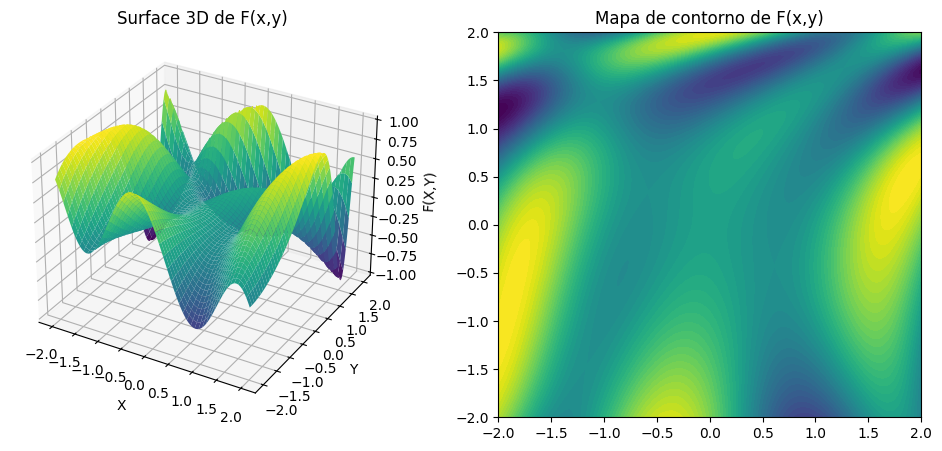

In [308]:
def F(x, y):
  return np.sin(0.5*x**2 - 0.25*y**2 + 3) * np.cos(2*x + 1 - np.exp(y))

#graph
x = np.linspace(-2, 2, 500)
y = np.linspace(-2, 2, 500)
X, Y = np.meshgrid(x, y)
Z = F(X, Y)

fig = plt.figure(figsize=(12,5))

# Surface plot
ax1 = fig.add_subplot(121, projection='3d')
ax1.plot_surface(X, Y, Z, cmap='viridis')
ax1.set_title("Surface 3D de F(x,y)")
ax1.set_xlabel("X")
ax1.set_ylabel("Y")
ax1.set_zlabel("F(X,Y)")

# Contour plot
ax2 = fig.add_subplot(122)
ax2.contourf(X, Y, Z, 50, cmap='viridis')
ax2.set_title("Mapa de contorno de F(x,y)")

plt.show()

In [309]:
def grad_F(x, y, h=1e-5):
  dfdx = (F(x+h, y) - F(x-h, y)) / (2*h)
  dfdy = (F(x, y+h) - F(x, y-h)) / (2*h)
  return np.array([dfdx, dfdy])

def gradient_descent_2D(f_grad, xy0, alpha, epsilon=1e-4, max_iter=1000):
  xy = np.array(xy0, dtype=float)
  for i in range(max_iter):
    grad = f_grad(xy[0], xy[1])
    xy_new = xy - alpha * grad
    if np.linalg.norm(xy_new - xy) < epsilon:
      break
  xy = xy_new
  return xy

xy0 = np.random.rand(2)  # punto inicial aleatorio
alpha = 0.001
min_xy = gradient_descent_2D(grad_F, xy0, alpha)
print("Mínimo aproximado:", min_xy, "F(min) =", F(min_xy[0], min_xy[1]))

Mínimo aproximado: [0.33284881 0.72929284] F(min) = 0.19957613811058525


###8. Empleando los siguientes datos :

```
X = np.linspace(0, 1, 100)
y = 0.2 + 0.2*X + 0.02*np.random.random(100)
```

y las herramientas desarrolladas en los apartados anteriores,
construya un algorítmo que permita determinar una regresión lineal.


In [310]:
X = np.linspace(0, 1, 100)
y = 0.2 + 0.2*X + 0.02*np.random.random(100)
data = {"X": X, "Y": y}
df = pd.DataFrame(data)
df.index.name = "Entrenamiento"
df

,X,Y
Entrenamiento,,
0,0.000000,0.205509
1,0.010101,0.207960
2,0.020202,0.222270
3,0.030303,0.211708
4,0.040404,0.225807
...,...,...
95,0.959596,0.406338
96,0.969697,0.413713
97,0.979798,0.414897


In [311]:
def h(X, theta_0, theta_1):
  return theta_0 + theta_1*X

def cost(theta_0, theta_1, X, y):
  m = len(X)
  J = 1/(2*m)*np.sum(((theta_0 + theta_1*X)-y)**2)
  return J

def gradient_descent(X, y, theta_0=0, theta_1=0, alpha=0.1, epsilon=1e-6, max_iter=1000):
  m = len(X)
  cost_history = []
  for i in range(max_iter):
    dtheta_0 = np.sum(theta_0 + theta_1*X - y)/m
    dtheta_1 = np.sum((theta_0 + theta_1*X - y)*X)/m

    #update parameters
    theta_0_new = theta_0 - alpha*dtheta_0
    theta_1_new = theta_1 - alpha*dtheta_1

    J = np.mean((theta_0_new + theta_1_new*X - y)**2)/2
    cost_history.append(J)
    #check for convergence
    if np.abs(theta_0_new - theta_0) < epsilon and np.abs(theta_1_new - theta_1) < epsilon:
      break
    theta_0, theta_1 = theta_0_new, theta_1_new
  return theta_0, theta_1, cost_history

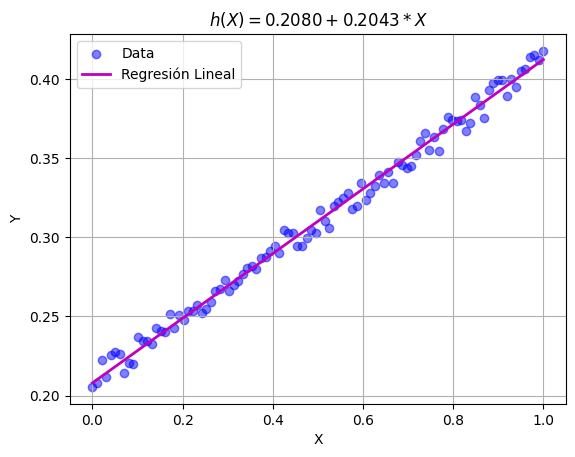

In [312]:
#Check
theta_0 = np.random.randn()
theta_1 = np.random.randn()
t0, t1, costo_final = gradient_descent(X, y, theta_0, theta_1)

#Graph
plt.title(f'$h(X)={t0:.4f}+{t1:.4f}*X$')
plt.scatter(X, y, label='Data', alpha=0.5, c="b")
plt.plot(X, h(X, t0, t1), label='Regresión Lineal',color='m', linewidth=2)
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid()

###9. Compare su resultado empleando la libreria linearRegresion() de sklearn.

In [322]:
X_reshaped = X.reshape(-1, 1)
model = LinearRegression()
model.fit(X_reshaped, y)
theta_0_sklearn = model.intercept_
theta_1_sklearn = model.coef_[0]
print("Sklearn: ", theta_0_sklearn, theta_1_sklearn)
print("My model: ", t0, t1)

Sklearn:  0.2085979963960976 0.20323712276640518
My model:  0.20802319589450724 0.20430964334901083


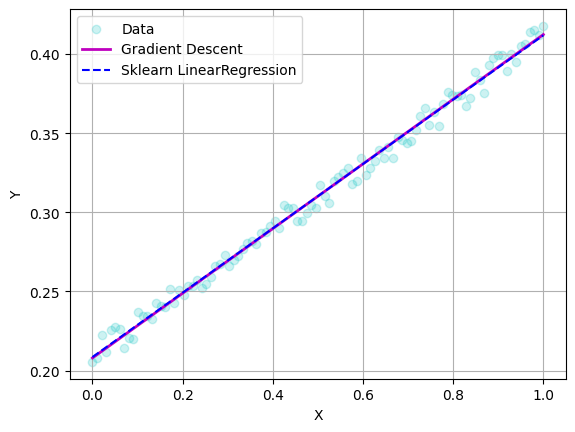

In [323]:
plt.scatter(X, y, label='Data', alpha=0.2, c='c')
plt.plot(X, h(X, t0, t1), label='Gradient Descent', color='m', linewidth=2)
plt.plot(X, model.predict(X_reshaped), label='Sklearn LinearRegression', color='b', linestyle='--')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid()
plt.show()

La regresión obtenida mediante el algoritmo de gradiente descendente coincide prácticamente con la obtenida usando LinearRegression de sklearn, lo que indica que nuestro modelo funciona correcta